In [1]:
# | eval: false
import pandas as pd
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk

In [2]:
# | eval: false
path_ = '/home/stirunag/work/github/ML4-legal-documents/judgements_xml/'
dataset_path = path_+'en_judgements_dataset'
ds = load_from_disk(dataset_path)

df = ds.to_pandas()

In [3]:
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...


In [4]:
# Convert publicationDate to datetime
df['publicationDate'] = pd.to_datetime(df['publicationDate'])

# Extract the publicationYear
df['publicationYear'] = df['publicationDate'].dt.year

# Calculate the length of tokens in content
df['contentTokenLength'] = df['content'].apply(lambda x: len(x.split()))

# Display the updated DataFrame
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri,publicationYear,contentTokenLength
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2008,2229
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2006,3681
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2012,7199
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2014,3515
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2018,1879


In [7]:
import matplotlib.pyplot as plt
import os

In [8]:
# Create the 'images' directory if it does not exist
os.makedirs('images', exist_ok=True)

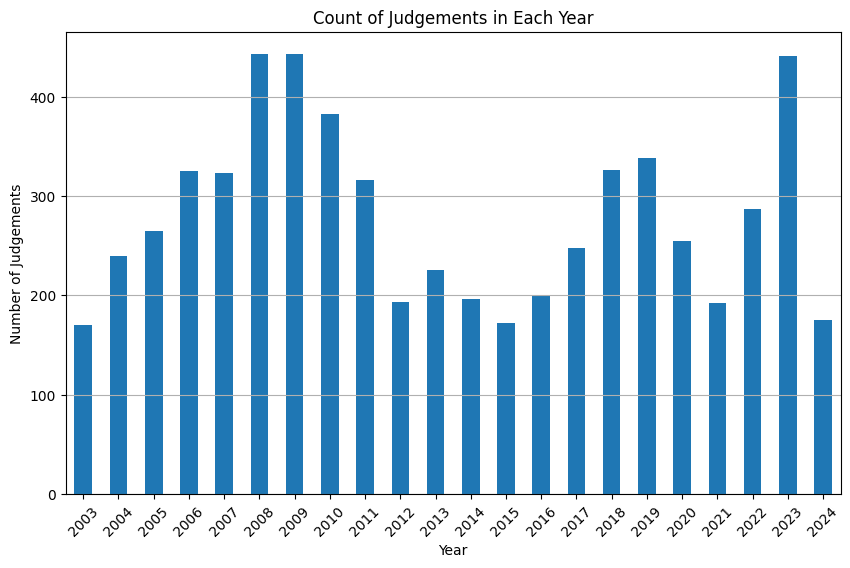

In [9]:
# Plotting
publication_counts = df['publicationYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
publication_counts.plot(kind='bar')
plt.title('Count of Judgements in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Judgements')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig('images/judgements_per_year.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

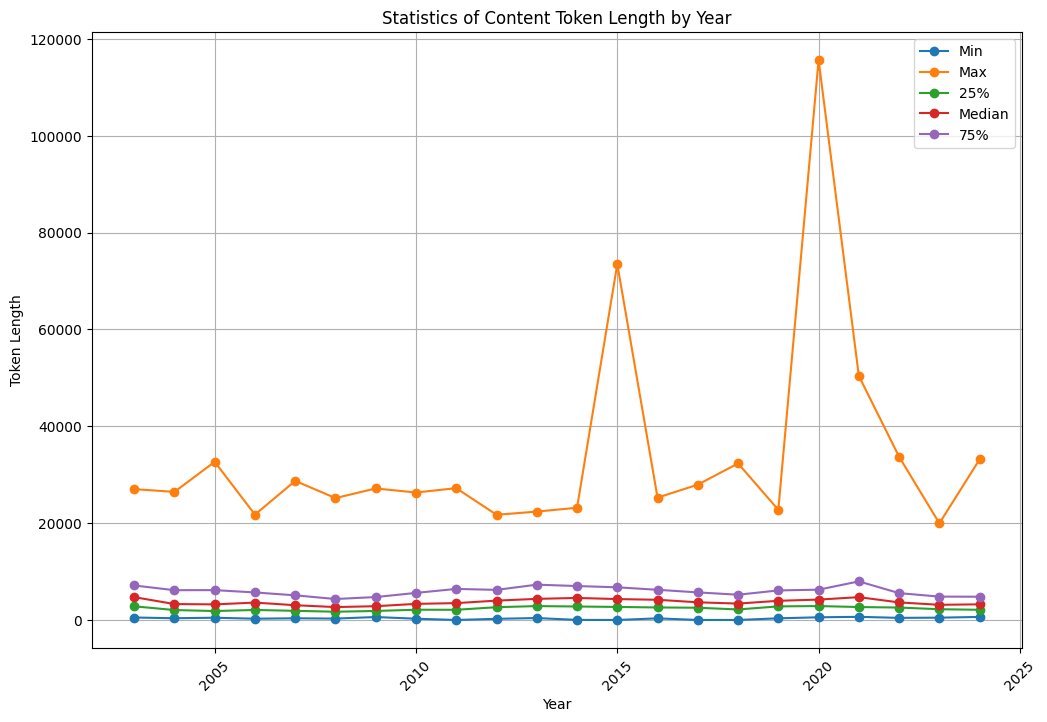

In [10]:
# Plotting
plt.figure(figsize=(12, 8))

# Group by year and calculate statistics
stats = df.groupby('publicationYear')['contentTokenLength'].describe(percentiles=[.25, .5, .75])


# Extracting the statistics for plotting
years = stats.index
min_values = stats['min']
max_values = stats['max']
q1_values = stats['25%']
median_values = stats['50%']
q3_values = stats['75%']

plt.plot(years, min_values, marker='o', linestyle='-', label='Min')
plt.plot(years, max_values, marker='o', linestyle='-', label='Max')
plt.plot(years, q1_values, marker='o', linestyle='-', label='25%')
plt.plot(years, median_values, marker='o', linestyle='-', label='Median')
plt.plot(years, q3_values, marker='o', linestyle='-', label='75%')

plt.title('Statistics of Content Token Length by Year')
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('images/stats_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

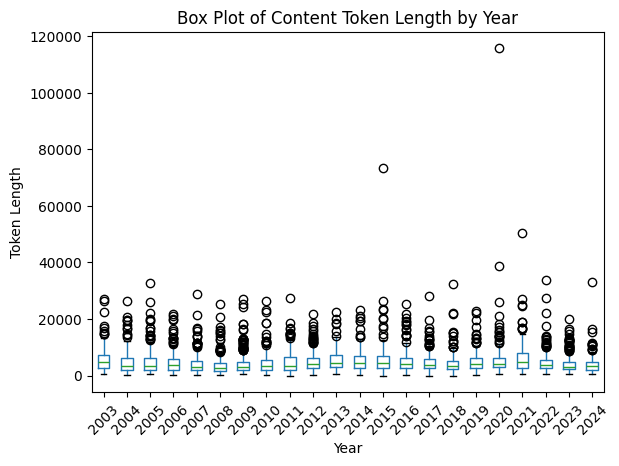

In [11]:
# Plotting the box plot for content token length by year
plt.figure(figsize=(12, 8))
df.boxplot(column='contentTokenLength', by='publicationYear', grid=False)
plt.title('Box Plot of Content Token Length by Year')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('images/box_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [12]:
# Function to extract closest rows for each statistic
def extract_stat_rows(df, stat):
    if stat == 'min':
        return df[df['contentTokenLength'] == df['contentTokenLength'].min()].iloc[0]
    elif stat == 'max':
        return df[df['contentTokenLength'] == df['contentTokenLength'].max()].iloc[0]
    elif stat == '25%':
        target = df['contentTokenLength'].quantile(0.25)
    elif stat == '50%':
        target = df['contentTokenLength'].median()
    elif stat == '75%':
        target = df['contentTokenLength'].quantile(0.75)
    
    # Find the closest value to the target
    closest_index = (df['contentTokenLength'] - target).abs().idxmin()
    return df.loc[closest_index]

# Group by year and apply the function
result = []
for year, group in df.groupby('publicationYear'):
    for stat in ['min', '25%', '50%', '75%', 'max']:
        row = extract_stat_rows(group, stat)
        result.append({
            'publicationYear': year,
            'stat': stat,
            'citation': row['citation']
        })

# Convert the result to a DataFrame
result_df = pd.DataFrame(result)

result_df

,publicationYear,stat,citation
0,2003,min,[2003] EWCA Crim 3
1,2003,25%,[2003] EWCA Crim 758
2,2003,50%,[2003] EWCA Crim 2243
3,2003,75%,[2003] EWCA Crim 1
4,2003,max,[2003] EWCA Crim 486
...,...,...,...
105,2024,min,[2024] EWCA Crim 36
106,2024,25%,[2024] EWCA Crim 108
107,2024,50%,[2024] EWCA Crim 238
108,2024,75%,[2024] EWCA Crim 544


In [13]:
# Checking for duplicate citations in the extracted DataFrame

# Check for duplicates in the 'citation' column
duplicate_citations = result_df[result_df.duplicated('citation', keep=False)]

# Display duplicate citations
duplicate_citations

,publicationYear,stat,citation


In [ ]:
cases_already_annotated = ['https://caselaw.nationalarchives.gov.uk/ewca/crim/2003/3',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2003/2243',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2004/2278',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2005/1983',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/694',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/1155',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2007/1530',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2008/553',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2009/1431',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2010/712',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2012/720',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2013/801',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2013/1649',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2016/52',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2017/1851',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2018/1766',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2019/362',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2020/499',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2022/83',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2023/231']

In [14]:
# Function to extract year and number from citation
def extract_url_from_citation(citation):
    parts = citation.split()
    year = parts[0].strip('[]')
    number = parts[-1]
    url = f"https://caselaw.nationalarchives.gov.uk/ewca/crim/{year}/{number}"
    return url

# Create URL column
result_df['url'] = result_df['citation'].apply(extract_url_from_citation)

# Display the result
result_df

,publicationYear,stat,citation,url
0,2003,min,[2003] EWCA Crim 3,https://caselaw.nationalarchives.gov.uk/ewca/c...
1,2003,25%,[2003] EWCA Crim 758,https://caselaw.nationalarchives.gov.uk/ewca/c...
2,2003,50%,[2003] EWCA Crim 2243,https://caselaw.nationalarchives.gov.uk/ewca/c...
3,2003,75%,[2003] EWCA Crim 1,https://caselaw.nationalarchives.gov.uk/ewca/c...
4,2003,max,[2003] EWCA Crim 486,https://caselaw.nationalarchives.gov.uk/ewca/c...
...,...,...,...,...
105,2024,min,[2024] EWCA Crim 36,https://caselaw.nationalarchives.gov.uk/ewca/c...
106,2024,25%,[2024] EWCA Crim 108,https://caselaw.nationalarchives.gov.uk/ewca/c...
107,2024,50%,[2024] EWCA Crim 238,https://caselaw.nationalarchives.gov.uk/ewca/c...
108,2024,75%,[2024] EWCA Crim 544,https://caselaw.nationalarchives.gov.uk/ewca/c...


In [19]:
import os

# Specify the path
path_ = '/home/stirunag/work/github/ML4-legal-documents/curation/'
save_csv_path = os.path.join(path_, 'dataset_curation_citations.csv')

# Create the directory if it does not exist
os.makedirs(path_, exist_ok=True)

# Save the result_df as a CSV file to the specified path
result_df.to_csv(save_csv_path, index=False)

save_csv_path

'/home/stirunag/work/github/ML4-legal-documents/curation/dataset_curation_citations.csv'

In [15]:
summary_stats = df.groupby('publicationYear')['contentTokenLength'].describe()

# Print the summary statistics
print("Summary Statistics by Year:")
print(summary_stats)


Summary Statistics by Year:
                 count         mean          std    min      25%     50%  \
publicationYear                                                            
2003             170.0  5743.064706  4387.290913  517.0  2828.50  4728.0   
2004             240.0  4716.270833  4111.903498  369.0  2060.75  3295.0   
2005             265.0  4787.267925  4415.211884  472.0  1852.00  3230.0   
2006             325.0  4428.040000  3361.190120  272.0  2079.00  3600.0   
2007             323.0  4039.136223  3330.045386  356.0  1896.00  3055.0   
2008             443.0  3522.930023  2848.773683  297.0  1713.50  2673.0   
2009             443.0  3874.828442  3389.295528  616.0  1868.50  2852.0   
2010             382.0  4366.023560  3362.366569  270.0  2125.00  3333.0   
2011             316.0  4618.781646  3650.428605    6.0  2111.00  3491.0   
2012             193.0  5103.072539  3751.223802  246.0  2647.00  4004.0   
2013             225.0  5513.791111  3763.898226  407.0  287

In [16]:
# Calculate the IQR for each year
df['Q1'] = df.groupby('publicationYear')['contentTokenLength'].transform(lambda x: x.quantile(0.25))
df['Q3'] = df.groupby('publicationYear')['contentTokenLength'].transform(lambda x: x.quantile(0.75))
df['IQR'] = df['Q3'] - df['Q1']

# Identify outliers
df['Outlier'] = (df['contentTokenLength'] < (df['Q1'] - 1.5 * df['IQR'])) | (df['contentTokenLength'] > (df['Q3'] + 1.5 * df['IQR']))

# Print outliers
outliers = df[df['Outlier']]
print("Outliers:")
print(outliers[['publicationYear', 'contentTokenLength']])

Outliers:
      publicationYear  contentTokenLength
19               2024                9497
33               2010               26334
36               2020               11690
38               2010               10957
45               2010               12051
...               ...                 ...
6065             2017               19795
6089             2016               18904
6104             2023               12721
6143             2005               32667
6146             2012               11636

[334 rows x 2 columns]


Median Token Length per Year:
publicationYear
2003    4728.0
2004    3295.0
2005    3230.0
2006    3600.0
2007    3055.0
2008    2673.0
2009    2852.0
2010    3333.0
2011    3491.0
2012    4004.0
2013    4366.0
2014    4558.5
2015    4325.5
2016    4181.0
2017    3656.0
2018    3394.5
2019    3969.5
2020    4216.0
2021    4720.5
2022    3637.0
2023    3141.0
2024    3238.0
Name: contentTokenLength, dtype: float64


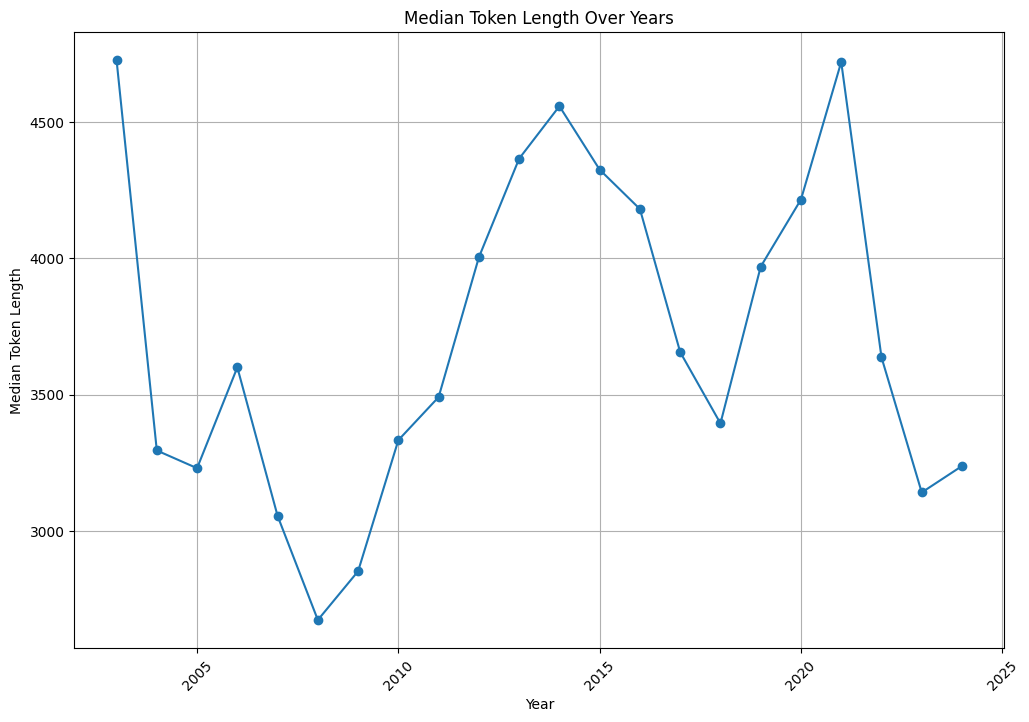

In [17]:
median_per_year = df.groupby('publicationYear')['contentTokenLength'].median()
print("Median Token Length per Year:")
print(median_per_year)

# Trends plot
plt.figure(figsize=(12, 8))
plt.plot(median_per_year.index, median_per_year.values, marker='o', linestyle='-')
plt.title('Median Token Length Over Years')
plt.xlabel('Year')
plt.ylabel('Median Token Length')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('images/median_token_length_trend.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

Mean Token Length per Year:
publicationYear
2003    5743.064706
2004    4716.270833
2005    4787.267925
2006    4428.040000
2007    4039.136223
2008    3522.930023
2009    3874.828442
2010    4366.023560
2011    4618.781646
2012    5103.072539
2013    5513.791111
2014    5501.719388
2015    5777.302326
2016    5218.628141
2017    4615.463710
2018    4154.012270
2019    4791.038462
2020    5712.909804
2021    6226.708333
2022    4605.592334
2023    3928.117914
2024    4082.102857
Name: contentTokenLength, dtype: float64
Standard Deviation of Token Length per Year:
publicationYear
2003    4387.290913
2004    4111.903498
2005    4415.211884
2006    3361.190120
2007    3330.045386
2008    2848.773683
2009    3389.295528
2010    3362.366569
2011    3650.428605
2012    3751.223802
2013    3763.898226
2014    3914.031421
2015    6747.950910
2016    4132.800240
2017    3386.199023
2018    3284.880108
2019    3130.068541
2020    8088.144242
2021    5663.852348
2022    3589.892608
2023    2682.0

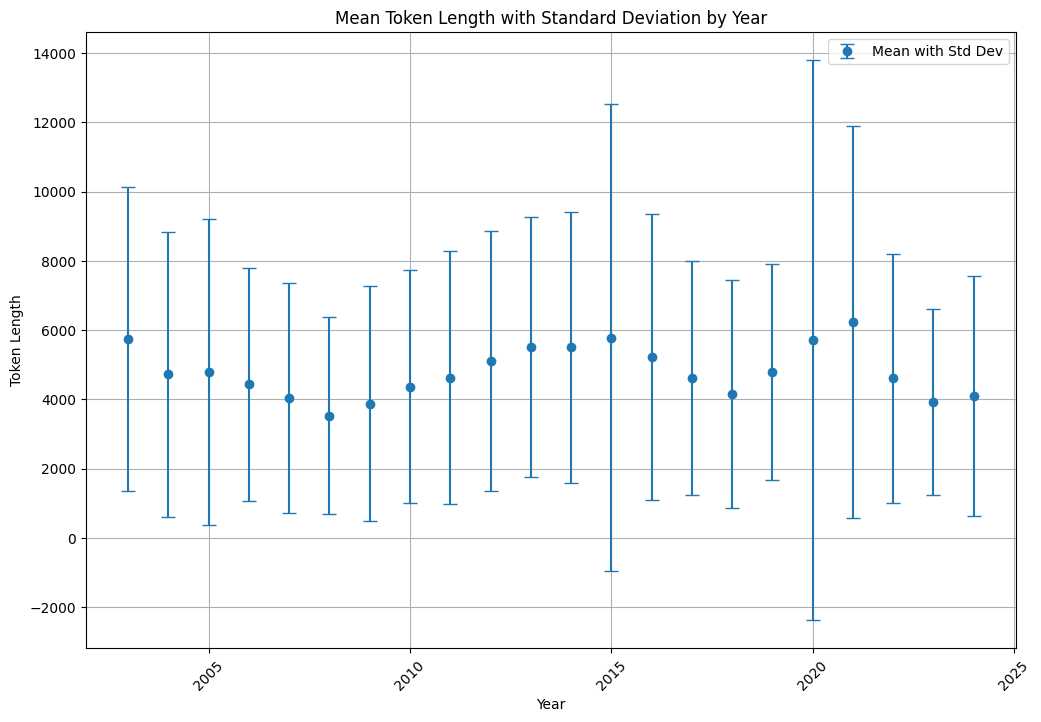

In [18]:
# Statistical summaries
mean_per_year = df.groupby('publicationYear')['contentTokenLength'].mean()
std_per_year = df.groupby('publicationYear')['contentTokenLength'].std()
var_per_year = df.groupby('publicationYear')['contentTokenLength'].var()

print("Mean Token Length per Year:")
print(mean_per_year)
print("Standard Deviation of Token Length per Year:")
print(std_per_year)
print("Variance of Token Length per Year:")
print(var_per_year)

# Plotting the statistical summaries
plt.figure(figsize=(12, 8))
plt.errorbar(mean_per_year.index, mean_per_year.values, yerr=std_per_year.values, fmt='o', capsize=5, label='Mean with Std Dev')
plt.title('Mean Token Length with Standard Deviation by Year')
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

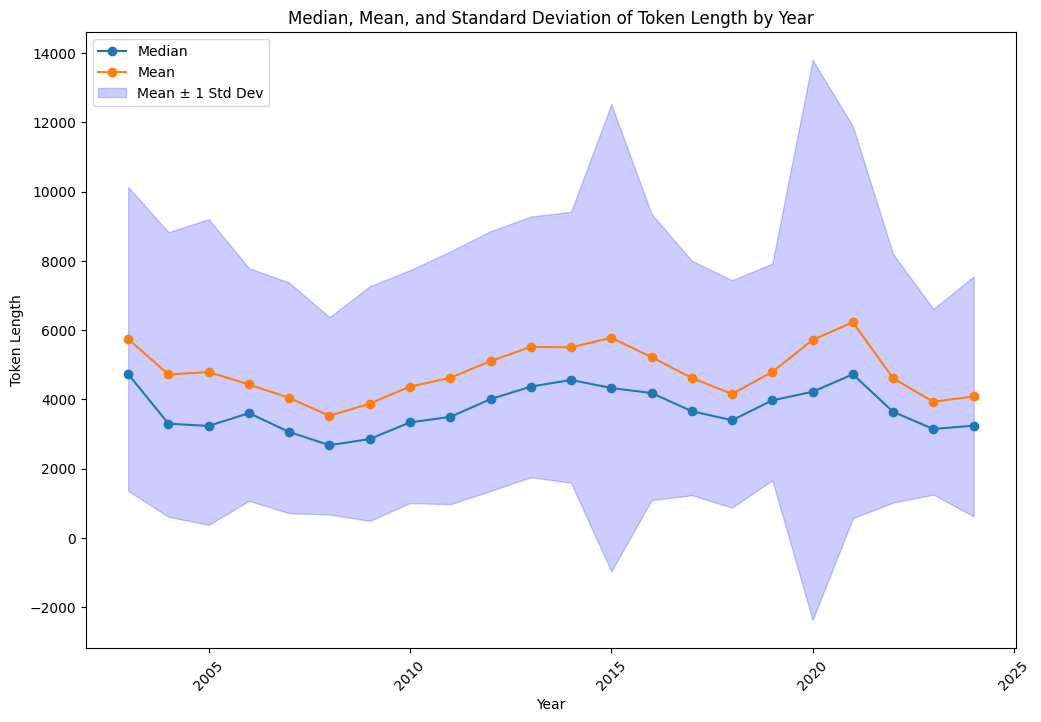

In [20]:
median_per_year = df.groupby('publicationYear')['contentTokenLength'].median()
mean_per_year = df.groupby('publicationYear')['contentTokenLength'].mean()
std_per_year = df.groupby('publicationYear')['contentTokenLength'].std()

# Plotting the median, mean, and standard deviation
plt.figure(figsize=(12, 8))
years = mean_per_year.index

plt.plot(years, median_per_year.values, marker='o', linestyle='-', label='Median')
plt.plot(years, mean_per_year.values, marker='o', linestyle='-', label='Mean')
plt.fill_between(years, mean_per_year.values - std_per_year.values, mean_per_year.values + std_per_year.values, color='b', alpha=0.2, label='Mean ± 1 Std Dev')

plt.title('Median, Mean, and Standard Deviation of Token Length by Year')
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()


# Save the plot as a PNG file
plt.savefig('images/median_mean_std_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()